In [6]:
# !pip install fastf1

In [7]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [8]:
#configurar gráficos
ff1.plotting.setup_mpl

# Habilitar el cache, está habilitado por default, si algo no funciona será esto.
# ff1.Cache.clear_cache

# Ignorar warnings
pd.options.mode.chained_assignment = None

In [9]:
#Para este ejemplo cargaremos y usaremos los datos de la carrera en Abu Dhabi 2021
# Parámetros de la sesión
# - Año
# - Circuito
# - Tipo de Dato
#   - R: Datos de la carrera
#   - Q: Datos de la clasificación

In [10]:
# Cargar datos de carrera y clasificación

race = ff1.get_session(2021, 'Yas Marina', 'R')
# quali = ff1.get_session(2021, 'Yas Marina', 'Q')

#Cargar los datos de cada vuelta con su telemetría para el análisis
race.load(laps=True, telemetry=True)

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7', '9']


In [11]:
# Escoger los pilotos que quiero estudiar
laps_r = race.laps

laps_ham = laps_r.pick_driver('HAM') #Lewis Hamilton
laps_ver = laps_r.pick_driver('VER') #Max Verstappen

laps_ham.dropna(subset = ['LapTime'], inplace=True)
laps_ver.dropna(subset = ['LapTime'], inplace=True)

### Primer Gráfico: Análisis del tiempo de carrera de ambos pilotos en el total de vueltas.

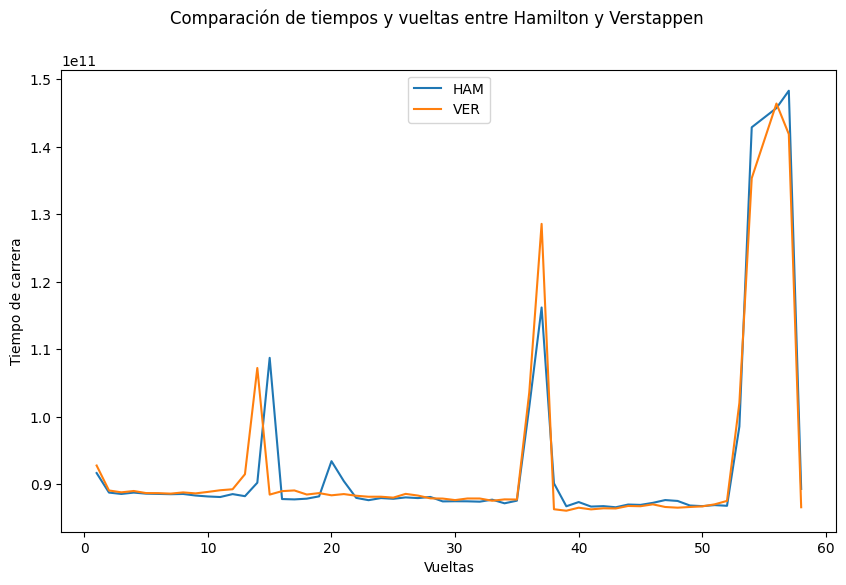

In [12]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots()
fig.suptitle("Comparación de tiempos y vueltas entre " + race.get_driver("HAM").LastName + " y " + race.get_driver("VER").LastName)

ax.plot(laps_ham['LapNumber'], laps_ham['LapTime'], label = 'HAM')
ax.plot(laps_ver['LapNumber'], laps_ver['LapTime'], label = 'VER')
ax.set(ylabel = 'Tiempo de carrera', xlabel = 'Vueltas')
ax.legend(loc = 'upper center')

plt.show()

### Superposición de trazas de velocidad, frenos y aceleración de ambos pilótos en la última vuelta
- Seleccionar los datos de los pilotos en la última vuelta
- Obtener los datos de telemetría de ambos pilotos
- Graficar

In [13]:
# Seleccionamos la última vuelta de cada piloto

ver_lap = laps_r.pick_driver('VER')
ham_lap = laps_r.pick_driver('HAM')

ver_ll = ver_lap[ver_lap.LapNumber==58]
ham_ll = ham_lap[ham_lap.LapNumber==58]

In [14]:
# Obtenemos los datos de telemetría para cada vuelta.
# Agregamos una columna "Distancia" al marco de datos de telemetría, ya que facilita la
# - comparación entre las vueltas.

ver_tel = ver_ll.get_car_data().add_distance()
ham_tel = ham_ll.get_car_data().add_distance()

### Gráfico de la comparación

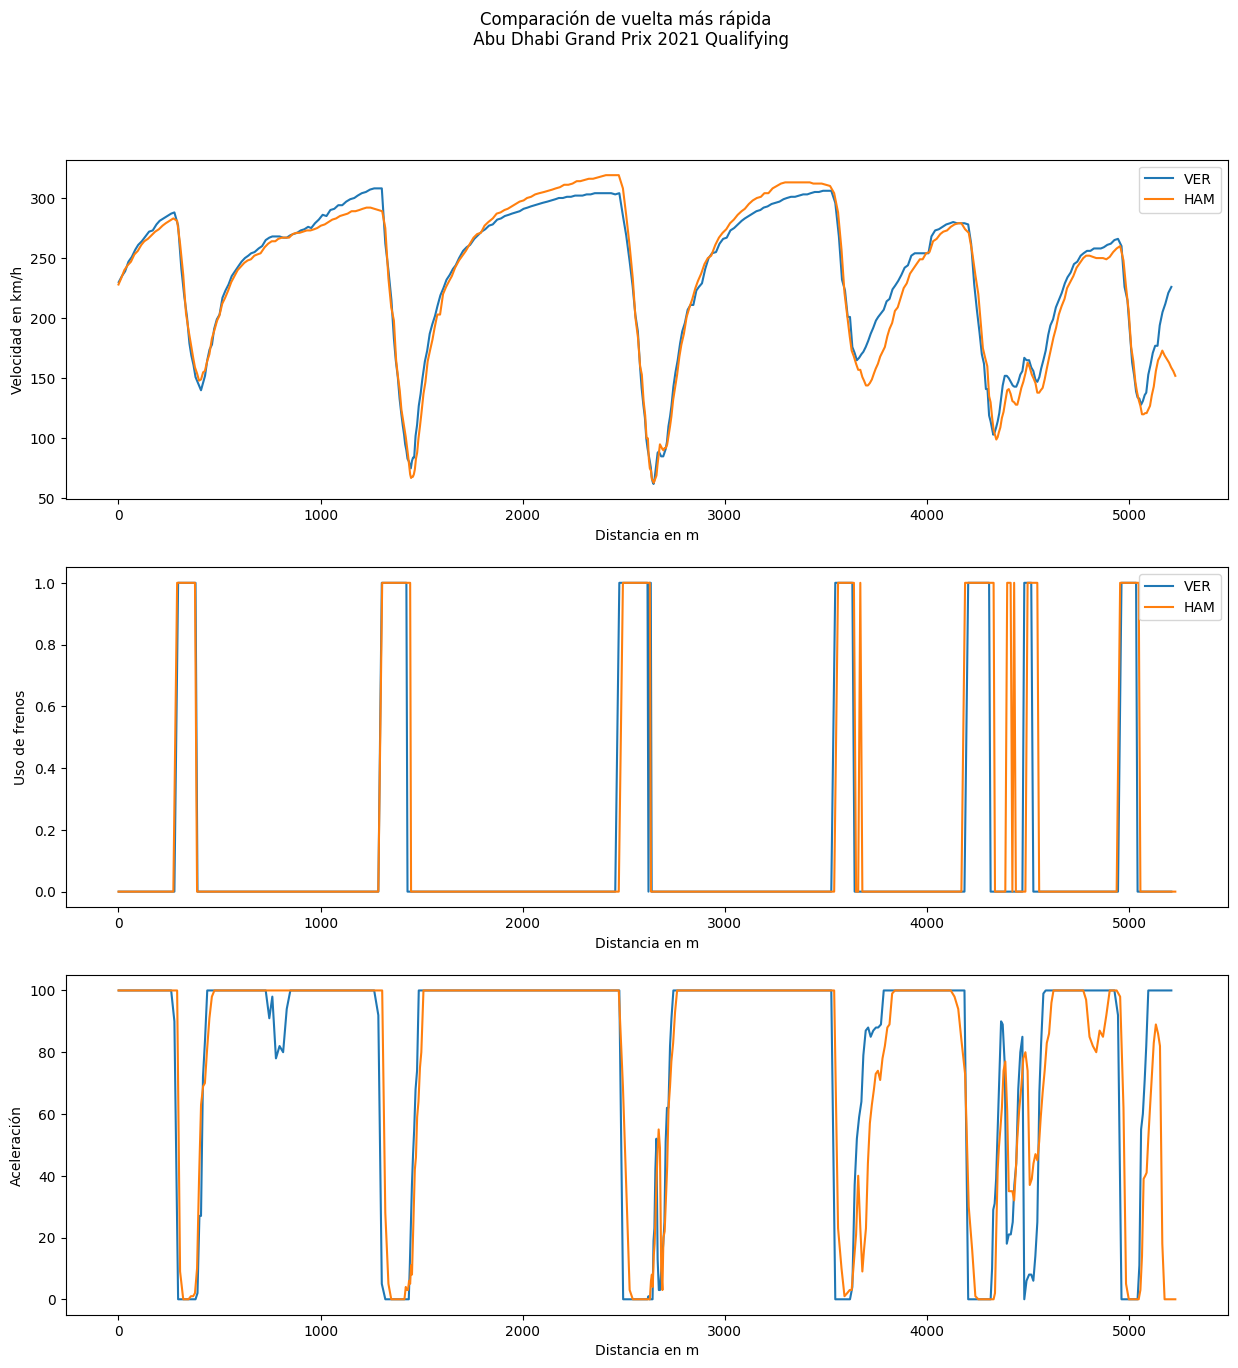

In [21]:
#Usar los colores del equipo para la gráfica

# No conseguí que funcionaran
rbr_color = ff1.plotting.team_color('RBT')
mer_color = ff1.plotting.team_color('MER')

plt.rcParams['figure.figsize'] = [15, 15]

#Cuantas gráficas hace
fig, ax = plt.subplots(3)

fig.suptitle("Comparación de telemetría de la última vuelta")

# Tabla 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], label = 'VER')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], label = 'HAM')
ax[0].set_xlabel('Distancia en m')
ax[0].set_ylabel('Velocidad en km/h')
ax[0].legend()

# Tabla 2
ax[1].plot(ver_tel['Distance'], ver_tel['Brake'], label = 'VER')
ax[1].plot(ham_tel['Distance'], ham_tel['Brake'], label = 'HAM')
ax[1].set_xlabel('Distancia en m')
ax[1].set_ylabel('Uso de frenos')
ax[1].legend()

# Tabla 3
ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], label = 'VER')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label = 'HAM')
ax[2].set_xlabel('Distancia en m')
ax[2].set_ylabel('Aceleración')

plt.suptitle(f'Comparación de vuelta más rápida \n '
             f'Abu Dhabi Grand Prix {race.event.year} Qualifying')

plt.show()

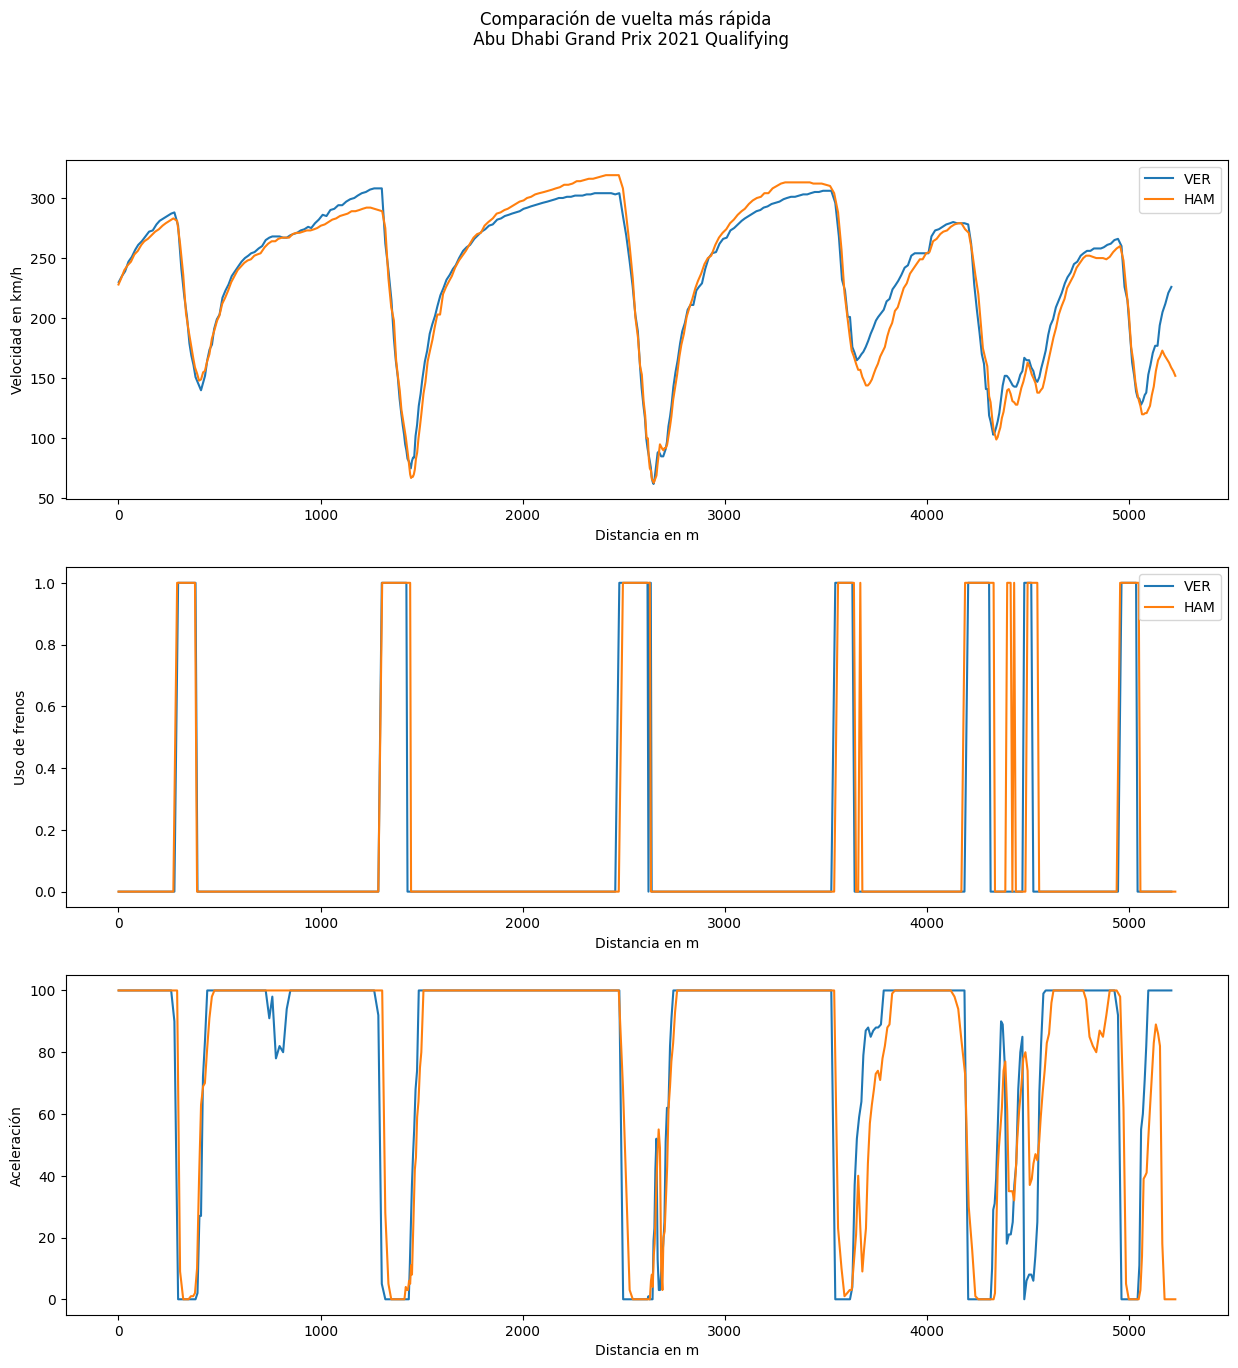

In [19]:
#Usar los colores del equipo para la gráfica

#RBR = Red Bull Racing
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

plt.rcParams['figure.figsize'] = [15, 15]

#Cuantas gráficas hace
fig, ax = plt.subplots(3)

fig.suptitle("Comparación de telemetría de la última vuelta")

# Tabla 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], label = 'VER')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], label = 'HAM')
ax[0].set_xlabel('Distancia en m')
ax[0].set_ylabel('Velocidad en km/h')
ax[0].legend()

# Tabla 2
ax[1].plot(ver_tel['Distance'], ver_tel['Brake'], label = 'VER')
ax[1].plot(ham_tel['Distance'], ham_tel['Brake'], label = 'HAM')
ax[1].set_xlabel('Distancia en m')
ax[1].set_ylabel('Uso de frenos')
ax[1].legend()

# Tabla 3
ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], label = 'VER')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label = 'HAM')
ax[2].set_xlabel('Distancia en m')
ax[2].set_ylabel('Aceleración')

plt.suptitle(f'Comparación de vuelta más rápida \n '
             f'Abu Dhabi Grand Prix {race.event.year} Qualifying')

plt.show()